In [2]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'sex' : ['M', 'F', np.nan, 'M', 'F'],
                   'score' : [5, 4, 3, 4, np.nan]}) # 결측치 값이 있는 데이터 프레임
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [3]:
df['score'] + 1 # 결측치가 있으면 연산 결과도 NaN

0    6.0
1    5.0
2    4.0
3    5.0
4    NaN
Name: score, dtype: float64

In [4]:
pd.isna(df) # 결측치 확인

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [5]:
pd.isna(df).sum() # 결측치 빈도 확인

sex      1
score    1
dtype: int64

In [6]:
df.dropna(subset = ['score']) # score 결측치 제거

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [7]:
df_nomiss = df.dropna(subset=['score']) # 결측치가 제거된 데이터 만들기
df_nomiss['score'] + 1 # 연산하면 결측치가 제거되어 출력

0    6.0
1    5.0
2    4.0
3    5.0
Name: score, dtype: float64

In [8]:
df_nomiss = df.dropna(subset=['score', 'sex']) # 여러 변수에서 결측치 제거
df_nomiss

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [9]:
df_nomiss = df.dropna() # 변수를 지정하지 않으면 모든 행에서 결측치 제거
df_nomiss

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [10]:
exam = pd.read_csv('exam.csv')
exam.loc[[2,7,14], ['math']] = np.nan #  math 열의 2,7,14 행에 Nan 할당
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [11]:
exam['math'].mean() # math 의 평균값

55.23529411764706

In [12]:
exam['math'] = exam['math'].fillna(55) # math가 NaN 인 행을 55(평균값)로 대체하여 오차 줄이기
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,55.0,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,55.0,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [13]:
exam['math'].isna().sum() # 결측치 빈도 확인

0

In [14]:
# 첫 번째 혼자서 해보기
# Q1
mpg = pd.read_csv('mpg.csv')
mpg.loc[[64,123,130,152,211], 'hwy'] = np.nan # hwy의 각 행에  NaN 할당

mpg[['drv','hwy']].isna().sum() # 결측치 5개 발견

drv    0
hwy    5
dtype: int64

In [15]:
# Q2
# dropna() 로 결측치 제거 - groupby() 로 drv 별 분리 - drv 별 hwy 의 평균 구하기
mpg.dropna(subset = ['hwy'])\
    .groupby('drv')\
    .agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.242424
f,28.200000
r,21.000000


In [16]:
df = pd.DataFrame({'sex' : [1,2,1,3,2,1],
                   'score' : [5,4,3,4,2,6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [17]:
# 존재할 수 없는 값이 있는지 확인
df['sex'].value_counts(sort = False).sort_index()
df['score'].value_counts(sort = False).sort_index()

2    1
3    1
4    2
5    1
6    1
Name: score, dtype: int64

In [18]:
# sex 값이 3이면 이상치(NaN) 값 부여
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex']) 
df

# score 값이 5보다 크면 이상치(NaN) 값 부여
df['score'] = np.where(df['score'] > 5, np.nan, df['score']) 
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [20]:
# 변수들에서 결측치 제거 후 분석
df.dropna(subset = ['sex','score'])\
    .groupby('sex')\
    .agg(mean_score = ('score', 'mean'))
# sex 행으로 groupby 후, score 행의 평균 구하기
# sex 가 1인 그룹의 평균은 4, 2인 그룹의 평균은 3

,mean_score
sex,
1.0,4.0
2.0,3.0


<Axes: ylabel='hwy'>

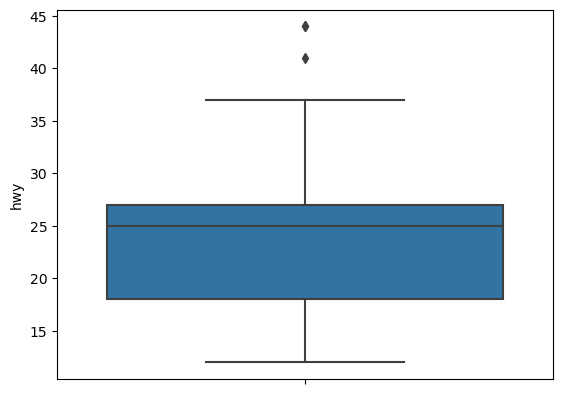

In [22]:
import seaborn as sns
sns.boxplot(data=mpg, y='hwy')

In [23]:
pct25 = mpg['hwy'].quantile(.25)
pct25 # 1사분위수

pct75 = mpg['hwy'].quantile(.75)
pct75 # 3사분위수

27.0

In [24]:
# 3에서 1을 빼서 iqr 길이 구하기
iqr = pct75 - pct25
iqr 

9.0

In [26]:
pct25 - 1.5 * iqr # 하한 - 4.5
pct75 + 1.5 * iqr # 상한 - 40.5

40.5

In [30]:
# 기준값을 벗어나면 NaN 부여
mpg['hwy'] = np.where((mpg['hwy']< 4.5) | (mpg['hwy']>40.5), np.nan, mpg['hwy'])

# 결측치 빈도 확인
mpg['hwy'].isna().sum()

8

In [32]:
# 결측지 제거 후 분석
mpg.dropna(subset = ['hwy'])\
    .groupby('drv')\
    .agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.242424
f,27.764706
r,21.000000
